In [1]:
!pip install transformers datasets sentencepiece

     |████████████████████████████████| 4.2 MB 5.4 MB/s 
     |████████████████████████████████| 342 kB 34.2 MB/s 
     |████████████████████████████████| 1.2 MB 28.7 MB/s 
     |████████████████████████████████| 596 kB 33.8 MB/s 
     |████████████████████████████████| 6.6 MB 28.1 MB/s 
     |████████████████████████████████| 84 kB 1.4 MB/s 
     |████████████████████████████████| 136 kB 36.5 MB/s 
     |████████████████████████████████| 1.1 MB 31.3 MB/s 
     |████████████████████████████████| 212 kB 47.6 MB/s 
     |████████████████████████████████| 127 kB 46.8 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 144 kB 47.5 MB/s 
     |████████████████████████████████| 271 kB 48.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

model_repo = 'google/mt5-small'
model_path = '/content/gdrive/My Drive/mt5_translation.pt'

Mounted at /content/gdrive




```
# This is formatted as code
```



[link text](https://)

In [4]:
from transformers import AutoTokenizer, AdamW, AutoModelForSeq2SeqLM, get_linear_schedule_with_warmup
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from torch.nn import functional as F
from torch import optim

In [5]:
sns.set()

In [6]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

Downloading:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/553 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/convert_slow_tokenizer.py:435: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"


In [8]:
# Model url : https://huggingface.co/google/mt5-small
model = AutoModelForSeq2SeqLM.from_pretrained(model_repo)
model = model.cuda()
# path(model)

In [9]:
input_sentence = 'The first sentence goes here!'
token_ids = tokenizer.encode(input_sentence, return_tensors = 'pt').cuda()

token_ids

model_out = model.generate(token_ids)
print(model_out)

tensor([[     0, 250099,      1]], device='cuda:0')


In [10]:
out_text = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(model_out[0]))
print(out_text)

<pad> <extra_id_0></s>


In [11]:
sample_sentence = '<jp> what are you doing?'
input_ids = tokenizer.encode(sample_sentence, return_tensors = 'pt')
print('Input IDs:',input_ids)

input_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('Input tokens:', input_tokens) 

Input IDs: tensor([[1042, 3889,  669, 2119,  418,  521,  342,  347,  291,    1]])
Input tokens: ['▁<', 'jp', '>', '▁what', '▁are', '▁you', '▁do', 'ing', '?', '</s>']


In [12]:
sorted(tokenizer.vocab.items(), key=lambda x: x[1])

[('<pad>', 0),
 ('</s>', 1),
 ('<unk>', 2),
 ('<0x00>', 3),
 ('<0x01>', 4),
 ('<0x02>', 5),
 ('<0x03>', 6),
 ('<0x04>', 7),
 ('<0x05>', 8),
 ('<0x06>', 9),
 ('<0x07>', 10),
 ('<0x08>', 11),
 ('<0x09>', 12),
 ('<0x0A>', 13),
 ('<0x0B>', 14),
 ('<0x0C>', 15),
 ('<0x0D>', 16),
 ('<0x0E>', 17),
 ('<0x0F>', 18),
 ('<0x10>', 19),
 ('<0x11>', 20),
 ('<0x12>', 21),
 ('<0x13>', 22),
 ('<0x14>', 23),
 ('<0x15>', 24),
 ('<0x16>', 25),
 ('<0x17>', 26),
 ('<0x18>', 27),
 ('<0x19>', 28),
 ('<0x1A>', 29),
 ('<0x1B>', 30),
 ('<0x1C>', 31),
 ('<0x1D>', 32),
 ('<0x1E>', 33),
 ('<0x1F>', 34),
 ('<0x20>', 35),
 ('<0x21>', 36),
 ('<0x22>', 37),
 ('<0x23>', 38),
 ('<0x24>', 39),
 ('<0x25>', 40),
 ('<0x26>', 41),
 ('<0x27>', 42),
 ('<0x28>', 43),
 ('<0x29>', 44),
 ('<0x2A>', 45),
 ('<0x2B>', 46),
 ('<0x2C>', 47),
 ('<0x2D>', 48),
 ('<0x2E>', 49),
 ('<0x2F>', 50),
 ('<0x30>', 51),
 ('<0x31>', 52),
 ('<0x32>', 53),
 ('<0x33>', 54),
 ('<0x34>', 55),
 ('<0x35>', 56),
 ('<0x36>', 57),
 ('<0x37>', 58),
 ('<0x38>',

In [13]:
# Dataset url = 'https://huggingface.co/datasets/alt'
dataset = load_dataset('alt')

No config specified, defaulting to: alt/alt-parallel


Generating train split:   0%|          | 0/18094 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1004 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1019 [00:00<?, ? examples/s]

Dataset alt downloaded and prepared to /root/.cache/huggingface/datasets/alt/alt-parallel/1.0.0/e784a3f2a9f6bdf277940de6cc9d700eab852896cd94aad4233caf26008da9ed. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
train_data = dataset['train']
test_data = dataset['test']

train_data[10]

{'SNT.URLID': '87564',
 'SNT.URLID.SNTID': '11',
 'translation': {'bg': 'এই তথ্যগুলি ইউকে ড্রাইভিং স্ট্যান্ডার্ড এজেন্সির বেসরকারী ঠিকাদার পিয়ারসন ড্রাইভিং অ্যাসেসমেন্ট লিঃ-এর মালিকানাভুক্ত একটি হার্ড ড্রাইভ থেকে হারিয়ে গেছে।',
  'en': 'The data was lost on a hard drive that was owned by Pearson Driving Assessments Ltd, a private contractor to the UK driving standards agency.',
  'en_tok': 'The data was lost on a hard drive that was owned by Pearson Driving Assessments Ltd , a private contractor to the UK driving standards agency .',
  'fil': 'Ang data ay nawala sa hard draib na pagmamay-ari ng Pearson Driving Assessments Ltd, isang pribadong kontratista sa ahensya ng palatuntunan ng pagmamaneho ng UK.',
  'hi': 'डेटा हार्ड ड्राइव से गायब हो गया था, हार्ड ड्राइव पीयरसन ड्राइविंग असेसमेंट लिमिटेड, जो यूके ड्राइविंग मानक एजेंसी के एक निजी ठेकेदार के स्वामित्व में था।',
  'id': 'Data yang hilang di Hard Disk dimiliki oleh Pearson Driving Assessment Ltd, sebuah kontraktor swasta bagi Badan

In [15]:
LANG_TOKEN_MAPPING = {
    'en': '<en>',
    'ja': '<jp>',
    'hi': '<hi>'
}

In [16]:
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))

Embedding(250103, 512)

In [17]:
model.config.max_length

20

In [18]:
max_seq_len = model.config.max_length

In [19]:
token_ids = tokenizer.encode(sample_sentence, return_tensors='pt',
                             padding = 'max_length',
                             truncation = True, 
                             max_length= max_seq_len)
print(token_ids)

tensor([[250101,   2119,    418,    521,    342,    347,    291,      1,      0,
              0,      0,      0,      0,      0,      0,      0,      0,      0,
              0,      0]])


In [20]:
token_ids = tokenizer.encode('jebfiu fjowf fewuhf re fjioiqwbe fe bg br rb e bb rne erj', return_tensors='pt',
                             padding = 'max_length',
                             truncation = True, 
                             max_length= max_seq_len)
print(token_ids)

tokens = tokenizer.convert_ids_to_tokens(token_ids[0])
print(tokens)

tensor([[53406,  1726,   273, 89875, 58903,   259,  6924,   273, 25944,   584,
           742,   976,   268,   266, 27282,   811,  8015,   259,  5979,     1]])
['▁jeb', 'fi', 'u', '▁fjo', 'wf', '▁', 'few', 'u', 'hf', '▁re', '▁f', 'ji', 'o', 'i', 'qw', 'be', '▁fe', '▁', 'bg', '</s>']


In [21]:
def encode_input_str(text, target_lang, seq_len, tokenizer,
                     lang_token_map = LANG_TOKEN_MAPPING):
 
  target_lang_token = lang_token_map[target_lang]

  text = target_lang_token + text
  input_ids = tokenizer.encode(text, return_tensors='pt', 
                               padding = 'max_length', truncation = True,
                               max_length = seq_len)
  return input_ids[0]


def encode_target_str(text, seq_len, tokenizer, 
                      lang_token_map= LANG_TOKEN_MAPPING):
  
  target_ids = tokenizer.encode(text, return_tensors='pt',
                                padding = 'max_length', truncation = True,
                                max_length = seq_len)
  return target_ids[0]


def format_translation_data(translations, tokenizer, 
                            lang_token_map,
                            seq_len = 64):
  
  langs = list(lang_token_map.keys())
  input_lang, output_lang = np.random.choice(langs, size = 2, replace = False)

  input_text = translations[input_lang]
  output_text = translations[output_lang]
  
  if input_text is None or output_text is None:
    return None
  
  input_token_ids = encode_input_str(input_text, output_lang, 
                                     seq_len, tokenizer, lang_token_map)
  ouptut_token_ids = encode_target_str(output_text, seq_len, tokenizer,
                                       lang_token_map)
  
  return input_token_ids, ouptut_token_ids

In [22]:
in_ids, out_ids = format_translation_data(train_data[0]['translation'], tokenizer, LANG_TOKEN_MAPPING)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

<hi> ▁ フランス の パリ 、 パル ク ・ デ ・ プラン ス で 行われた 2007 年 ラグビー ワールド カップ の プール C で 、 イタリア は 31 対 5 で ポル ト ガル を下 した 。 </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁2007 ▁में ▁फ़ ्रा ंस , ▁पे रिस ▁के ▁पार् क ▁डे स ▁ प्रि ंस ेस ▁में ▁हु ए ▁ र ग् बी ▁विश्व ▁कप ▁के ▁पू ल ▁C ▁में ▁ इट ली ▁ने ▁पुर् त गाल ▁को ▁3 1-5 ▁से ▁हर ाया । </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


In [23]:
def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []

  for translation_set in batch['translation']:
    formatted_data = format_translation_data(translation_set, 
                                             tokenizer, 
                                             lang_token_map, max_seq_len)
    
    if formatted_data is None:
      continue
    
    input_ids, output_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0)) 
    targets.append(output_ids.unsqueeze(0))

  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, tokenizer, lang_token_map, batch_size = 32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i : i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

In [24]:
in_ids, out_ids = format_translation_data(train_data[1]['translation'], tokenizer, LANG_TOKEN_MAPPING)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

data_gen = get_data_generator(train_data, tokenizer, LANG_TOKEN_MAPPING, 8)
data_batch = next(data_gen)
print('Input shape ', data_batch[0].shape)
print('Output shape ', data_batch[1].shape)

<jp> ▁Andrea ▁Masi ▁ opened ▁the ▁scor ing ▁in ▁the ▁four th ▁minute ▁with ▁ a ▁try ▁for ▁Italy . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁ アンド レア ・ マー ジ が 開始 4 分 後の トライ で イタリア にとって 最初の 得点 を入れ た 。 </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
Input shape  torch.Size([8, 20])
Output shape  torch.Size([8, 20])


In [25]:
data_batch[0] #input

tensor([[250100,   6226,  86050,    641,    259,   6783,   1048,    641,   6784,
           3570,  27592,   3332,    261,    381,  64705,  54422,  18019,    641,
          57028,      1],
        [250101,    486,  31162,  76006,   2109,  10440,  15403,    345,    702,
            461,    259,  48246, 175129,   1803,   9137,  22741,    455,    313,
          11597,      1],
        [250100,  16777,   4157,    844,    261,  13894, 176020,  41938,  15417,
            259,  63626,   1693,  20254,   1890,    259,  79088,    259,  20793,
           1100,      1],
        [250100,   2139,  17259,   1396,    757,   7397,   1676,  31945,   5362,
           5724,   1762,   1396,    844,   9537,   7247,   9654,   1890,   3526,
          29177,      1],
        [250102,    259,  40722,   5072, 111350,   3802,  19076,  48339,  89189,
            535,   7367,  41300,    292,   5072, 111350,   3802,   2878, 137900,
           5996,      1],
        [250100,  22918,   2916,   1822,  56575,  38633,   5

In [26]:
# model.load_state_dict(torch.load(model_path))

In [66]:
# Fine-tuning pre trained BERT Model

n_epochs = 8
batch_size = 16
print_freq = 30
lr = 5e-5
n_batches = int(np.ceil(len(train_data) / batch_size))
total_steps = n_batches * n_epochs
warmup_steps = int(total_steps * 0.02)

In [63]:
 optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(optimizer, warmup_steps, total_steps)

losses=[]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [29]:
from tqdm import tqdm_notebook
from IPython.display import display
from IPython.html import widgets

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [64]:
def eval_model(model, gdataset, max_iters = 8):
  
  test_generator = get_data_generator(gdataset, tokenizer, 
                                      LANG_TOKEN_MAPPING, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i > max_iters:
      break

    model_out = model.forward(input_ids = input_batch,
                              labels = label_batch)
    eval_losses.append(model_out.loss.item())
  
  return np.mean(eval_losses)

In [65]:
# Retraining the model

for epoch_index in range(n_epochs):

  data_generator = get_data_generator(train_data, tokenizer, LANG_TOKEN_MAPPING, batch_size)
  for batch_index, (input_batch, label_batch) \
    in tqdm_notebook(enumerate(data_generator), total = n_batches):
    
    optimizer.zero_grad()

    # Forward pass
    model_out = model.forward(
                input_ids = input_batch,
                labels = label_batch)
    
    # Loss and weights
    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()
  
    # training update info
    if (batch_index + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_index+1, batch_index+1, avg_loss, scheduler.get_last_lr()[0]))
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 1 | Step: 30 | Avg. loss: 1.772 | lr: 8.333333333333334e-06
Epoch: 1 | Step: 60 | Avg. loss: 1.736 | lr: 1.6666666666666667e-05
Epoch: 1 | Step: 90 | Avg. loss: 1.782 | lr: 2.5e-05
Epoch: 1 | Step: 120 | Avg. loss: 1.804 | lr: 3.3333333333333335e-05
Epoch: 1 | Step: 150 | Avg. loss: 1.753 | lr: 4.166666666666667e-05
Epoch: 1 | Step: 180 | Avg. loss: 1.855 | lr: 5e-05
Epoch: 1 | Step: 210 | Avg. loss: 1.740 | lr: 4.983085250338295e-05
Epoch: 1 | Step: 240 | Avg. loss: 1.730 | lr: 4.96617050067659e-05
Epoch: 1 | Step: 270 | Avg. loss: 1.731 | lr: 4.949255751014885e-05
Epoch: 1 | Step: 300 | Avg. loss: 1.751 | lr: 4.93234100135318e-05
Epoch: 1 | Step: 330 | Avg. loss: 1.715 | lr: 4.915426251691475e-05
Epoch: 1 | Step: 360 | Avg. loss: 1.795 | lr: 4.89851150202977e-05
Epoch: 1 | Step: 390 | Avg. loss: 1.805 | lr: 4.881596752368065e-05
Epoch: 1 | Step: 420 | Avg. loss: 1.747 | lr: 4.86468200270636e-05
Epoch: 1 | Step: 450 | Avg. loss: 1.744 | lr: 4.847767253044655e-05
Epoch: 1 | Step

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 2 | Step: 30 | Avg. loss: 1.700 | lr: 4.4468876860622464e-05
Epoch: 2 | Step: 60 | Avg. loss: 1.718 | lr: 4.4299729364005414e-05
Epoch: 2 | Step: 90 | Avg. loss: 1.606 | lr: 4.4130581867388364e-05
Epoch: 2 | Step: 120 | Avg. loss: 1.697 | lr: 4.3961434370771314e-05
Epoch: 2 | Step: 150 | Avg. loss: 1.578 | lr: 4.3792286874154264e-05
Epoch: 2 | Step: 180 | Avg. loss: 1.678 | lr: 4.3623139377537214e-05
Epoch: 2 | Step: 210 | Avg. loss: 1.696 | lr: 4.3453991880920164e-05
Epoch: 2 | Step: 240 | Avg. loss: 1.636 | lr: 4.3284844384303114e-05
Epoch: 2 | Step: 270 | Avg. loss: 1.758 | lr: 4.3115696887686063e-05
Epoch: 2 | Step: 300 | Avg. loss: 1.768 | lr: 4.294654939106901e-05
Epoch: 2 | Step: 330 | Avg. loss: 1.697 | lr: 4.277740189445196e-05
Epoch: 2 | Step: 360 | Avg. loss: 1.733 | lr: 4.260825439783491e-05
Epoch: 2 | Step: 390 | Avg. loss: 1.698 | lr: 4.243910690121786e-05
Epoch: 2 | Step: 420 | Avg. loss: 1.735 | lr: 4.226995940460081e-05
Epoch: 2 | Step: 450 | Avg. loss: 1.737 | 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 3 | Step: 30 | Avg. loss: 1.693 | lr: 3.8092016238159675e-05
Epoch: 3 | Step: 60 | Avg. loss: 1.664 | lr: 3.7922868741542625e-05
Epoch: 3 | Step: 90 | Avg. loss: 1.650 | lr: 3.7753721244925575e-05
Epoch: 3 | Step: 120 | Avg. loss: 1.600 | lr: 3.7584573748308525e-05
Epoch: 3 | Step: 150 | Avg. loss: 1.645 | lr: 3.7415426251691475e-05
Epoch: 3 | Step: 180 | Avg. loss: 1.751 | lr: 3.7246278755074425e-05
Epoch: 3 | Step: 210 | Avg. loss: 1.693 | lr: 3.7077131258457375e-05
Epoch: 3 | Step: 240 | Avg. loss: 1.711 | lr: 3.6907983761840325e-05
Epoch: 3 | Step: 270 | Avg. loss: 1.791 | lr: 3.6738836265223275e-05
Epoch: 3 | Step: 300 | Avg. loss: 1.713 | lr: 3.6569688768606225e-05
Epoch: 3 | Step: 330 | Avg. loss: 1.685 | lr: 3.6400541271989175e-05
Epoch: 3 | Step: 360 | Avg. loss: 1.676 | lr: 3.6231393775372125e-05
Epoch: 3 | Step: 390 | Avg. loss: 1.652 | lr: 3.6062246278755074e-05
Epoch: 3 | Step: 420 | Avg. loss: 1.695 | lr: 3.5893098782138024e-05
Epoch: 3 | Step: 450 | Avg. loss: 1.6

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 4 | Step: 30 | Avg. loss: 1.558 | lr: 3.171515561569689e-05
Epoch: 4 | Step: 60 | Avg. loss: 1.651 | lr: 3.1546008119079837e-05
Epoch: 4 | Step: 90 | Avg. loss: 1.695 | lr: 3.1376860622462787e-05
Epoch: 4 | Step: 120 | Avg. loss: 1.610 | lr: 3.1207713125845736e-05
Epoch: 4 | Step: 150 | Avg. loss: 1.652 | lr: 3.1038565629228686e-05
Epoch: 4 | Step: 180 | Avg. loss: 1.666 | lr: 3.0869418132611636e-05
Epoch: 4 | Step: 210 | Avg. loss: 1.641 | lr: 3.0700270635994586e-05
Epoch: 4 | Step: 240 | Avg. loss: 1.652 | lr: 3.0531123139377536e-05
Epoch: 4 | Step: 270 | Avg. loss: 1.694 | lr: 3.0361975642760486e-05
Epoch: 4 | Step: 300 | Avg. loss: 1.675 | lr: 3.0192828146143436e-05
Epoch: 4 | Step: 330 | Avg. loss: 1.613 | lr: 3.0023680649526386e-05
Epoch: 4 | Step: 360 | Avg. loss: 1.667 | lr: 2.9854533152909336e-05
Epoch: 4 | Step: 390 | Avg. loss: 1.654 | lr: 2.9685385656292286e-05
Epoch: 4 | Step: 420 | Avg. loss: 1.628 | lr: 2.9516238159675236e-05
Epoch: 4 | Step: 450 | Avg. loss: 1.67

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 5 | Step: 30 | Avg. loss: 1.643 | lr: 2.53382949932341e-05
Epoch: 5 | Step: 60 | Avg. loss: 1.576 | lr: 2.516914749661705e-05
Epoch: 5 | Step: 90 | Avg. loss: 1.657 | lr: 2.5e-05
Epoch: 5 | Step: 120 | Avg. loss: 1.612 | lr: 2.483085250338295e-05
Epoch: 5 | Step: 150 | Avg. loss: 1.633 | lr: 2.46617050067659e-05
Epoch: 5 | Step: 180 | Avg. loss: 1.601 | lr: 2.449255751014885e-05
Epoch: 5 | Step: 210 | Avg. loss: 1.635 | lr: 2.43234100135318e-05
Epoch: 5 | Step: 240 | Avg. loss: 1.673 | lr: 2.415426251691475e-05
Epoch: 5 | Step: 270 | Avg. loss: 1.647 | lr: 2.39851150202977e-05
Epoch: 5 | Step: 300 | Avg. loss: 1.623 | lr: 2.381596752368065e-05
Epoch: 5 | Step: 330 | Avg. loss: 1.646 | lr: 2.36468200270636e-05
Epoch: 5 | Step: 360 | Avg. loss: 1.593 | lr: 2.347767253044655e-05
Epoch: 5 | Step: 390 | Avg. loss: 1.604 | lr: 2.33085250338295e-05
Epoch: 5 | Step: 420 | Avg. loss: 1.622 | lr: 2.313937753721245e-05
Epoch: 5 | Step: 450 | Avg. loss: 1.666 | lr: 2.29702300405954e-05
Epoc

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 6 | Step: 30 | Avg. loss: 1.585 | lr: 1.8961434370771313e-05
Epoch: 6 | Step: 60 | Avg. loss: 1.523 | lr: 1.8792286874154263e-05
Epoch: 6 | Step: 90 | Avg. loss: 1.637 | lr: 1.8623139377537212e-05
Epoch: 6 | Step: 120 | Avg. loss: 1.639 | lr: 1.8453991880920162e-05
Epoch: 6 | Step: 150 | Avg. loss: 1.579 | lr: 1.8284844384303112e-05
Epoch: 6 | Step: 180 | Avg. loss: 1.579 | lr: 1.8115696887686062e-05
Epoch: 6 | Step: 210 | Avg. loss: 1.595 | lr: 1.7946549391069012e-05
Epoch: 6 | Step: 240 | Avg. loss: 1.573 | lr: 1.7777401894451962e-05
Epoch: 6 | Step: 270 | Avg. loss: 1.553 | lr: 1.7608254397834915e-05
Epoch: 6 | Step: 300 | Avg. loss: 1.599 | lr: 1.7439106901217865e-05
Epoch: 6 | Step: 330 | Avg. loss: 1.620 | lr: 1.7269959404600812e-05
Epoch: 6 | Step: 360 | Avg. loss: 1.662 | lr: 1.7100811907983762e-05
Epoch: 6 | Step: 390 | Avg. loss: 1.665 | lr: 1.693166441136671e-05
Epoch: 6 | Step: 420 | Avg. loss: 1.589 | lr: 1.676251691474966e-05
Epoch: 6 | Step: 450 | Avg. loss: 1.559

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 7 | Step: 30 | Avg. loss: 1.598 | lr: 1.2584573748308526e-05
Epoch: 7 | Step: 60 | Avg. loss: 1.554 | lr: 1.2415426251691476e-05
Epoch: 7 | Step: 90 | Avg. loss: 1.591 | lr: 1.2246278755074425e-05
Epoch: 7 | Step: 120 | Avg. loss: 1.534 | lr: 1.2077131258457375e-05
Epoch: 7 | Step: 150 | Avg. loss: 1.562 | lr: 1.1907983761840325e-05
Epoch: 7 | Step: 180 | Avg. loss: 1.595 | lr: 1.1738836265223275e-05
Epoch: 7 | Step: 210 | Avg. loss: 1.638 | lr: 1.1569688768606225e-05
Epoch: 7 | Step: 240 | Avg. loss: 1.582 | lr: 1.1400541271989175e-05
Epoch: 7 | Step: 270 | Avg. loss: 1.672 | lr: 1.1231393775372125e-05
Epoch: 7 | Step: 300 | Avg. loss: 1.563 | lr: 1.1062246278755075e-05
Epoch: 7 | Step: 330 | Avg. loss: 1.614 | lr: 1.0893098782138025e-05
Epoch: 7 | Step: 360 | Avg. loss: 1.615 | lr: 1.0723951285520975e-05
Epoch: 7 | Step: 390 | Avg. loss: 1.613 | lr: 1.0554803788903925e-05
Epoch: 7 | Step: 420 | Avg. loss: 1.623 | lr: 1.0385656292286875e-05
Epoch: 7 | Step: 450 | Avg. loss: 1.6

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 8 | Step: 30 | Avg. loss: 1.608 | lr: 6.207713125845738e-06
Epoch: 8 | Step: 60 | Avg. loss: 1.552 | lr: 6.038565629228688e-06
Epoch: 8 | Step: 90 | Avg. loss: 1.620 | lr: 5.869418132611638e-06
Epoch: 8 | Step: 120 | Avg. loss: 1.519 | lr: 5.7002706359945875e-06
Epoch: 8 | Step: 150 | Avg. loss: 1.518 | lr: 5.5311231393775375e-06
Epoch: 8 | Step: 180 | Avg. loss: 1.573 | lr: 5.361975642760487e-06
Epoch: 8 | Step: 210 | Avg. loss: 1.651 | lr: 5.192828146143437e-06
Epoch: 8 | Step: 240 | Avg. loss: 1.604 | lr: 5.023680649526387e-06
Epoch: 8 | Step: 270 | Avg. loss: 1.582 | lr: 4.854533152909337e-06
Epoch: 8 | Step: 300 | Avg. loss: 1.588 | lr: 4.685385656292287e-06
Epoch: 8 | Step: 330 | Avg. loss: 1.678 | lr: 4.516238159675237e-06
Epoch: 8 | Step: 360 | Avg. loss: 1.605 | lr: 4.347090663058187e-06
Epoch: 8 | Step: 390 | Avg. loss: 1.518 | lr: 4.177943166441137e-06
Epoch: 8 | Step: 420 | Avg. loss: 1.687 | lr: 4.008795669824087e-06
Epoch: 8 | Step: 450 | Avg. loss: 1.664 | lr: 3.8

In [67]:
# checkpoint_freq = 1000

test_loss = eval_model(model, test_data)
print('Saving model with test loss of {:.3f}'.format(test_loss))

Saving model with test loss of 2.990


In [68]:
torch.save(model.state_dict(), model_path)

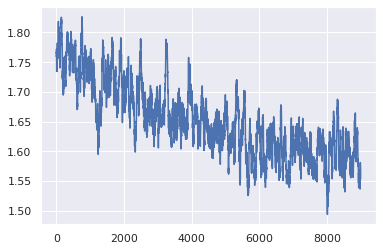

In [70]:
# charting loss

window_size = 50
smoothed_losses = []

for i in range(len(losses) - window_size):
  smoothed_losses.append(np.mean(losses[i: i+window_size]))

plt.plot(smoothed_losses)

In [71]:
# Testing

test_sentence = test_data[0]['translation']['en']
print('Raw input text:', test_sentence)

input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'ja',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)

input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text: ', tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[0])))

Raw input text: It has been confirmed that eight thoroughbred race horses at Randwick Racecourse in Sydney have been infected with equine influenza.
Truncated input text:  <jp> It has been confirmed that eight thoroughbred race horses at Randwick Racecourse</s>


In [72]:
output_tokens = model.generate(input_ids, num_beams=15, num_return_sequences=3)

# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

伝えられるところでは、ラージェンウィック・レースコーストで8人のサーファー
伝えられるところでは、ラージェンウィック・レースパークで8人のサーファーが
伝えられるところでは、ラージェンウィック・レースコーストの8人のサーファー


In [98]:
# Translate (Add Form)
input_text = 'I saw you at the park today.'  #@param {type: 'string'}
output_language = 'hi'  #@param ['en', 'ja', 'hi']

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=30, length_penalty=0.3)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))

I saw you at the park today.  ->  मैंने आज पार्क में आपको देखा।
